In [22]:
import numpy as np
import scipy.stats as stat
import scipy.optimize as optimize

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import cross_validation, metrics, neighbors 
from random import choice

## Генерируем выборку

In [13]:
# дисперсия нормального распределения
D = 0.2

# создадим точки по первому правилу

# количество точек
N = 500

x1s = np.linspace(0, 100, N)

y1s = x1s * 0.5 + 1 + stat.norm.rvs(size=x1s.shape, scale=D**0.5)

# создадим точки по второму правилу

# количество точек
K = 75

x2s = np.array([choice(x1s) for loop in range(K)])
y2s = stat.norm.rvs(size=x2s.shape, scale=D**0.5, loc=-1.0)

# все точки

xs, ys = np.concatenate([x1s, x2s]), np.concatenate([y1s, y2s])

## Поглядим на выборку

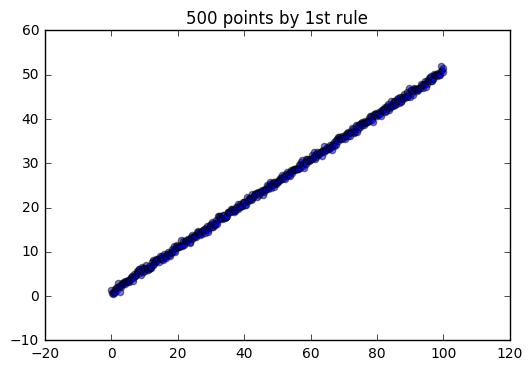

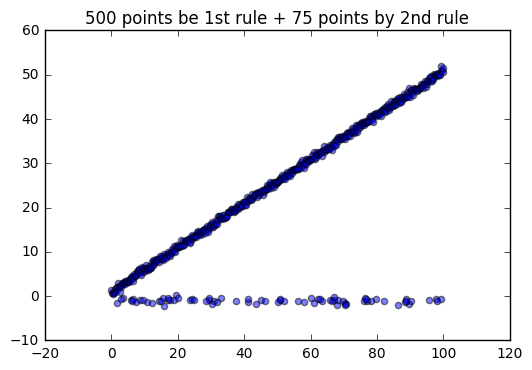

In [23]:
def show_scatter(x, y, title):
    plt.scatter(x, y, alpha=0.5)
    plt.title(title)
    plt.show()
    
show_scatter(x1s, y1s, "%d points by 1st rule" % N)
show_scatter(xs, ys, "%d points be 1st rule + %d points by 2nd rule" % (N, K))

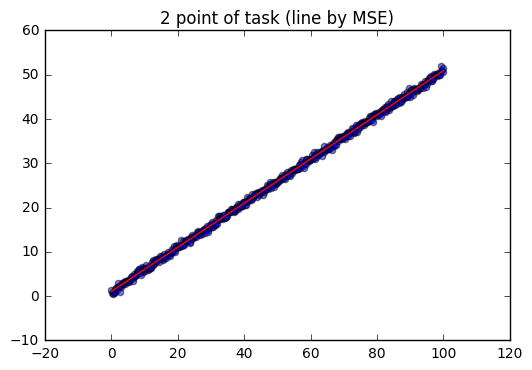

In [52]:
def find_line(metric, x, y):
    ret = optimize.minimize(lambda theta: metric(theta[0] * x + theta[1], y), (1, 1))
    return ret.x[0], ret.x[1]
    
def show_scatter_and_lines(x, y, lines, title):
    plt.scatter(x, y, alpha=0.5)
    for a, b, color in lines:
        plt.plot(x, x * a + b, color=color)
    plt.title(title)
    plt.show()
    
a, b = find_line(metrics.mean_squared_error, x1s, y1s)

show_scatter_and_lines(x1s, y1s, [(a, b, "r")], "2 point of task (line by MSE)")

Визуализация для 3го пункта задания.

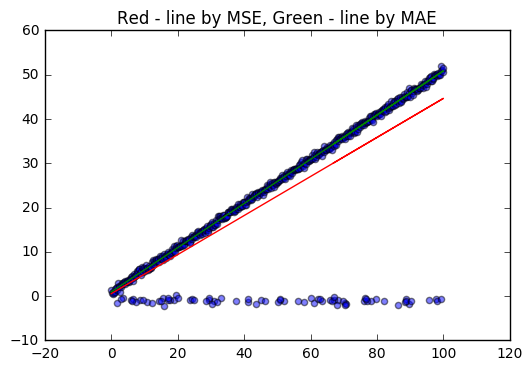

In [51]:
a1, b1 = find_line(metrics.mean_squared_error, xs, ys)
a2, b2 = find_line(metrics.mean_absolute_error, xs, ys)


show_scatter_and_lines(xs, ys, [(a1, b1, "r"), (a2, b2, "g")], "Red - line by MSE, Green - line by MAE")

## Вывод.

Модель с минимизацией MAE более устойчива к сильным выбросам. Причем, в целом, не имеет значения, насколько сильный выброс, если он находится рядом с "не выбросом" по оси x. Напротив, при использовании MSE всего лишь один сильный выброс может изменить картину.